In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import json
plt.style.use('classic')

mmaxstr = '$M_{max}$'

def to_scientific_latex(number):
    """
    Převede číslo na LaTeXový vědecký formát.é

    Args:
    number (int or float): Číslo k převedení.

    Returns:
    str: Číslo ve formátu LaTeX $10^x$.
    """
    if number == 0:
        return "$0$"
    
    exponent = int(np.floor(np.log10(abs(number))))
    base = number / (10 ** exponent)
    
    # Případ, kdy základ je 10, což znamená že číslo je přesně 10^exponent
    if base == 10:
        return f"$10^{{{exponent+1}}}$"
    
    # Zobrazíme jako celé číslo, pokud je základ celočíselně roven samotnému základu
    if base == int(base):
        base = int(base)
    
    # Když základ je 1, zobrazujeme pouze mocninu desítky
    if base == 1:
        return f"$10^{{{exponent}}}$"
    else:
        return f"${{ {base} \\times 10^{{{exponent}}} }}$"



data = {
    'Label': ['1k', '10k', '1m', '25k', '2m'],
    'Value1': [100, 200, 300, 400, 500],
    'Value2': [10, 20, 30, 40, 50],
    'Value3': [0.1, 0.2, 0.3, 0.4, 0.5],
    'Value4': [0.01, 0.02, 0.03, 0.04, 0.05]
}
df = pd.DataFrame(data)

# Funkce pro transformaci Label sloupce
def transform_label(label):
    label = str(label)
    if label.endswith('k'):
        return int(label[:-1]) * 1000
    elif label.endswith('m'):
        return int(label[:-1]) * 1000000
    else:
        return int(label)  # Pro případ, že label je už v čistě číselné formě

# Aplikace transformace

file_path="nn_time-24-04-25,11:14__half.json"
# Load JSON data from file
with open(file_path, 'r') as file:
    data_dict = json.load(file)

# Load data into Python Dictionary

# Convert to DataFrame
df = pd.DataFrame(data_dict['benchmarks'])
# filter only run_type == aggregate
df = df.loc[df['run_type'] == "aggregate"]
df["number_points"] = df["name"].str.extract(r'/(\d+)/', expand=False)
df["number_points"] = (df["number_points"]).fillna(0).astype(int)
df["M_max"] = df["name"].str.extract(r'/\d+/(\d+)')
df["M_max"] = (df["M_max"]).fillna(0).astype(int)


df['real_time'] =  df['real_time']

df_mean = df.loc[df['name'].str.endswith("mean")]
df_median = df.loc[df['name'].str.endswith("median")]


df_mean

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,aggregate_name,aggregate_unit,cpu_coefficient,real_coefficient,big_o,rms,number_points,M_max
50,basicnn/100/8_mean,0,0,basicnn/100/8,aggregate,50,NaN,1,50.0,256.685245,257.394630,ns,mean,time,NaN,NaN,NaN,NaN,100,8
104,basicnn/100/16_mean,0,1,basicnn/100/16,aggregate,50,NaN,1,50.0,243.720909,244.201027,ns,mean,time,NaN,NaN,NaN,NaN,100,16
158,basicnn/100/32_mean,0,2,basicnn/100/32,aggregate,50,NaN,1,50.0,255.774208,256.272181,ns,mean,time,NaN,NaN,NaN,NaN,100,32
212,basicnn/100/64_mean,0,3,basicnn/100/64,aggregate,50,NaN,1,50.0,271.538596,272.098471,ns,mean,time,NaN,NaN,NaN,NaN,100,64
266,basicnn/100/96_mean,0,4,basicnn/100/96,aggregate,50,NaN,1,50.0,272.889729,274.066479,ns,mean,time,NaN,NaN,NaN,NaN,100,96
320,basicnn/100/128_mean,0,5,basicnn/100/128,aggregate,50,NaN,1,50.0,272.977169,273.701660,ns,mean,time,NaN,NaN,NaN,NaN,100,128
374,basicnn/100/256_mean,0,6,basicnn/100/256,aggregate,50,NaN,1,50.0,270.462816,270.750255,ns,mean,time,NaN,NaN,NaN,NaN,100,256
428,basicnn/1000/8_mean,0,7,basicnn/1000/8,aggregate,50,NaN,1,50.0,273.929339,274.558246,ns,mean,time,NaN,NaN,NaN,NaN,1000,8
482,basicnn/1000/16_mean,0,8,basicnn/1000/16,aggregate,50,NaN,1,50.0,262.377380,262.825120,ns,mean,time,NaN,NaN,NaN,NaN,1000,16
536,basicnn/1000/32_mean,0,9,basicnn/1000/32,aggregate,50,NaN,1,50.0,292.870853,293.285901,ns,mean,time,NaN,NaN,NaN,NaN,1000,32


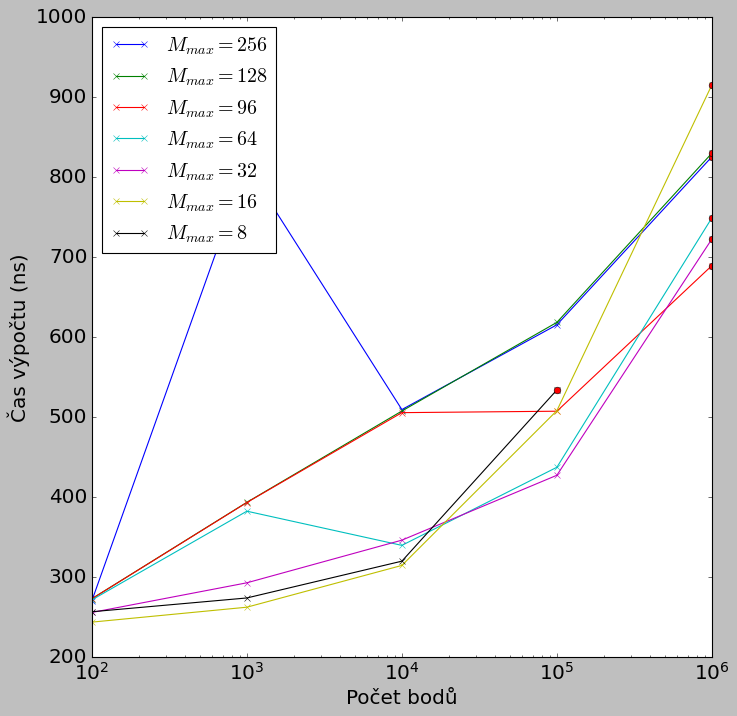

In [3]:

fig, ax = plt.subplots(figsize=(10,10))

m_max_values = sorted(df_mean['M_max'].unique(), reverse=True)
for i in m_max_values:
    tmp_df = df_mean.loc[df_mean['M_max'] == i]
    if not tmp_df.empty:
        ax.plot(tmp_df['number_points'], tmp_df['real_time'], '-x', label=f"{mmaxstr}$= {i}$")
        ax.plot(tmp_df['number_points'].iloc[-1], tmp_df['real_time'].iloc[-1], 'o', color="r")

ax.set_ylabel('Čas výpočtu (ns)', fontsize=18)
# ax.set_title('Čas výpočtu by M_max and Number of Points')
ax.set_xticks(df_mean['number_points'].unique())  # Nastaví ticks na ose X
ax.set_xlabel('Počet bodů', fontsize=18)
ax.set_xscale('log')

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)


ax.legend(loc='upper left',  fontsize=18)
plt.savefig('benchmark_nn_points_Mmax.pdf',  bbox_inches='tight')


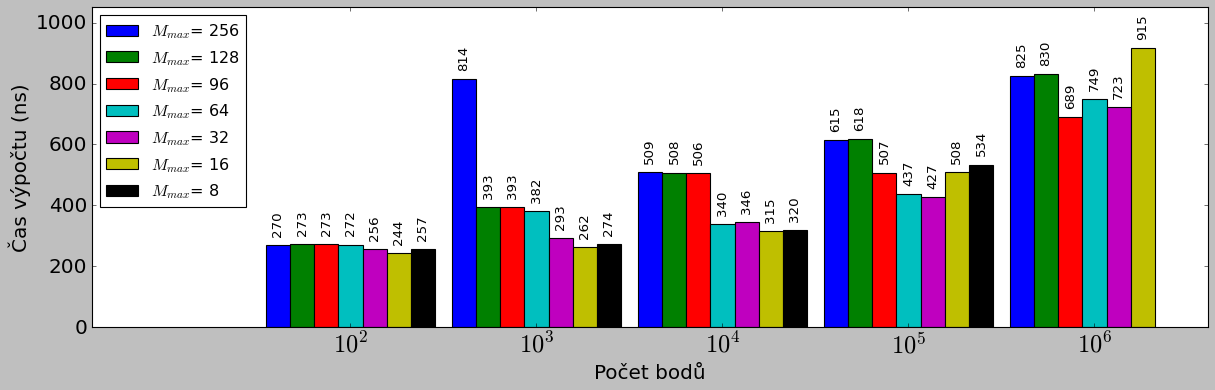

In [4]:
fig, ax = plt.subplots(figsize=(18, 5))

m_max_str = '$M_{max}$'




# Get unique M_max values and sort them if needed
m_max_values = sorted(df_mean['M_max'].unique(), reverse=True)
width = 0.13  # Width of the bars

# Determine the number of unique number_points, assumed sorted
unique_points = sorted(df_mean['number_points'].unique())
n_groups = len(unique_points)

# Create an index array for the x-axis
index = np.arange(n_groups)

for i, m_max in enumerate(m_max_values):
    # Filter the dataframe for each M_max
    tmp_df = df_mean[df_mean['M_max'] == m_max]


    # Align bars side by side by shifting the x-axis index
    if (m_max == 8):
        bars = ax.bar((index + i * width)[:4], tmp_df['real_time'], width, label=f"{m_max_str}= {m_max}")
    else:        
        bars = ax.bar((index + i * width), tmp_df['real_time'], width, label=f"{m_max_str}= {m_max}")
    plt.bar_label(bars, rotation=90, padding=8, fmt="{:.0f}",)
    
    # ax.bar_label(bars,  rotation=90)

ax.set_xlabel('Počet bodů' , fontsize=18)
ax.set_ylabel('Čas výpočtu (ns)' , fontsize=18)
# ax.set_title('Comparison of Mean Times for Different M_max Values')
ax.set_xticks(index + width / 2 * (len(m_max_values) - 1))
asdasd = [to_scientific_latex(i) for i in unique_points]  
ax.set_xticklabels(asdasd, rotation=0)
ax.legend(loc='upper left')

ax.set_ylim([0,1050])

plt.yticks(fontsize=18)
plt.xticks(fontsize=22)


plt.savefig('benchmark_nnspeed_points_Mmax_bar.pdf',  bbox_inches='tight')



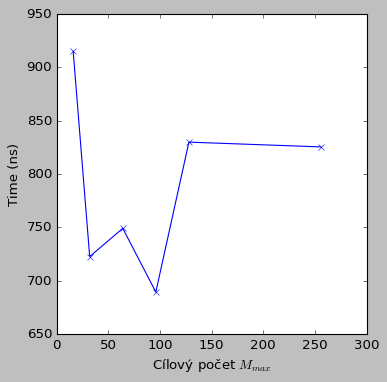

In [5]:
fig, ax = plt.subplots(figsize=(5,5))

# Get unique M_max values and sort them if needed
max_values = max(df_mean['number_points'].unique())

tmp_df = df_mean[df_mean['number_points'] == max_values]

ax.plot(tmp_df['M_max'], tmp_df['real_time'], '-x')

ax.set_xlabel('Cílový počet $M_{max}$')
ax.set_ylabel('Time (ns)')
# ax.set_title('Doba potřebná pro vypočtení struktry ve pro různá $M_{max}$')

plt.savefig('benchmark_nnspeed_points_highest.pdf',  bbox_inches='tight')


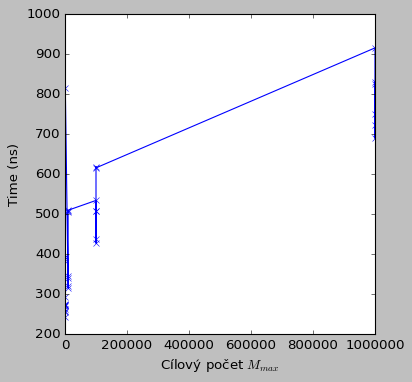

In [6]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(df_mean['number_points'], df_mean['real_time'], '-x')

ax.set_xlabel('Cílový počet $M_{max}$')
ax.set_ylabel('Time (ns)')
# ax.set_title('Doba potřebná pro vypočtení struktry ve pro různá $M_{max}$')

plt.savefig('benchmark_nnspeed_points_highest.pdf',  bbox_inches='tight')


In [7]:
tmp_df['number_points'].iloc[-1]



1000000